<a href="https://colab.research.google.com/github/rupam-20/student-performance-analysis/blob/main/studentperf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Libraries

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (/content/StudentsPerformance (1).csv)

# Loading and inspecting the Dataset

In [8]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/StudentsPerformance (1).csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'StudentsPerformance.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


# Let's take a quick look at what the data looks like:

In [9]:
df1.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Distribution graphs (histogram/bar graph) of column data

In [24]:
import matplotlib.pyplot as plt
import math

def plotNumericColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    # Keep only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    nCols = min(nGraphShown, len(numeric_cols))
    nRows = math.ceil(nCols / nGraphPerRow)

    plt.figure(figsize=(nGraphPerRow * 5, nRows * 5))

    for i in range(nCols):
        plt.subplot(nRows, nGraphPerRow, i + 1)
        column = df[numeric_cols[i]]
        column.hist()
        plt.title(numeric_cols[i])

    plt.tight_layout()
    plt.show()


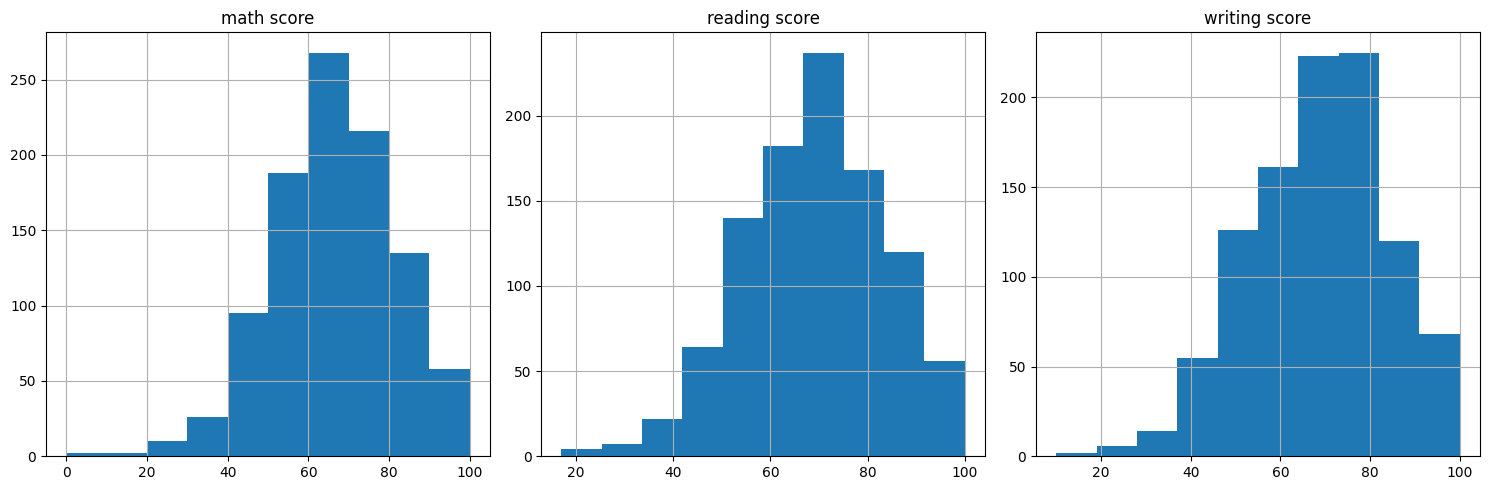

In [25]:
plotNumericColumnDistribution(df, 10, 3)


# Scatter and density plots

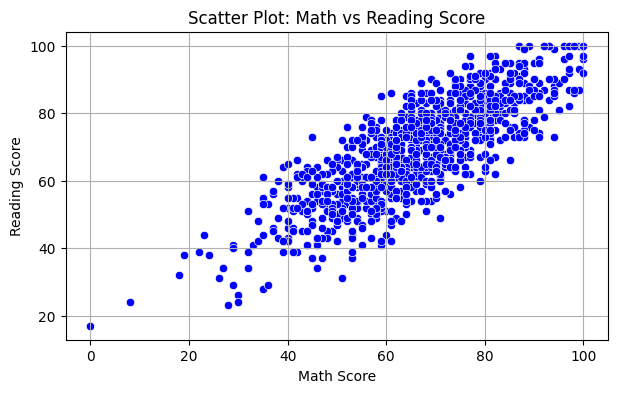

In [19]:

plt.figure(figsize=(7,4))
sns.scatterplot(x="math score", y="reading score", data=numeric_df, color="blue")
plt.title("Scatter Plot: Math vs Reading Score")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.grid(True)
plt.show()


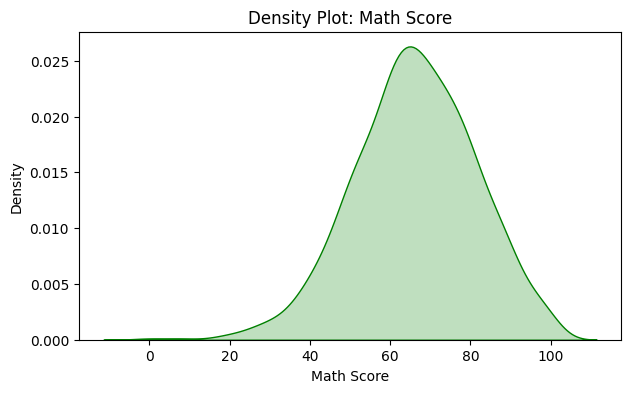

In [20]:
#  DENSITY PLOT
plt.figure(figsize=(7,4))
sns.kdeplot(numeric_df["math score"], fill=True, color="green")
plt.title("Density Plot: Math Score")
plt.xlabel("Math Score")
plt.ylabel("Density")
plt.show()


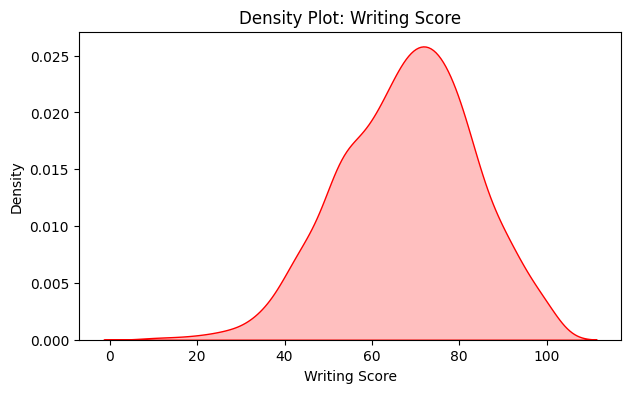

In [21]:
#  DENSITY PLOT
plt.figure(figsize=(7,4))
sns.kdeplot(numeric_df["writing score"], fill=True, color="red")
plt.title("Density Plot: Writing Score")
plt.xlabel("Writing Score")
plt.ylabel("Density")
plt.show()

# Correlation matrix:

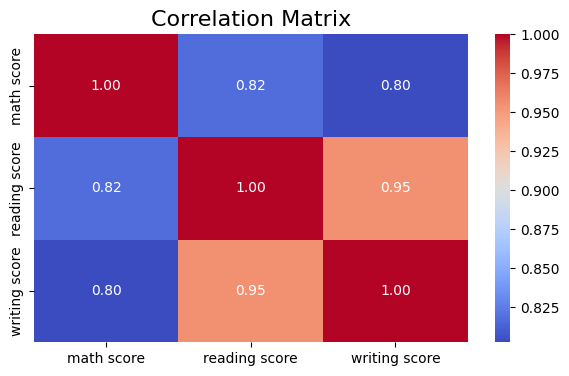

In [22]:

# Compute correlation only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()


# Column-wise Distribution Plots

In [28]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    columns = df.columns
    nCols = min(nGraphShown, len(columns))
    nRows = math.ceil(len(columns) / nGraphPerRow)

    plt.figure(figsize=(nGraphPerRow * 5, nRows * 5))

    for i in range(nCols):
        plt.subplot(nRows, nGraphPerRow, i + 1)
        column = df.iloc[:, i]
        if column.dtype == 'object':
            column.value_counts().plot.bar()
        else:
            column.hist()
        plt.title(column.name)

    plt.tight_layout()
    plt.show()


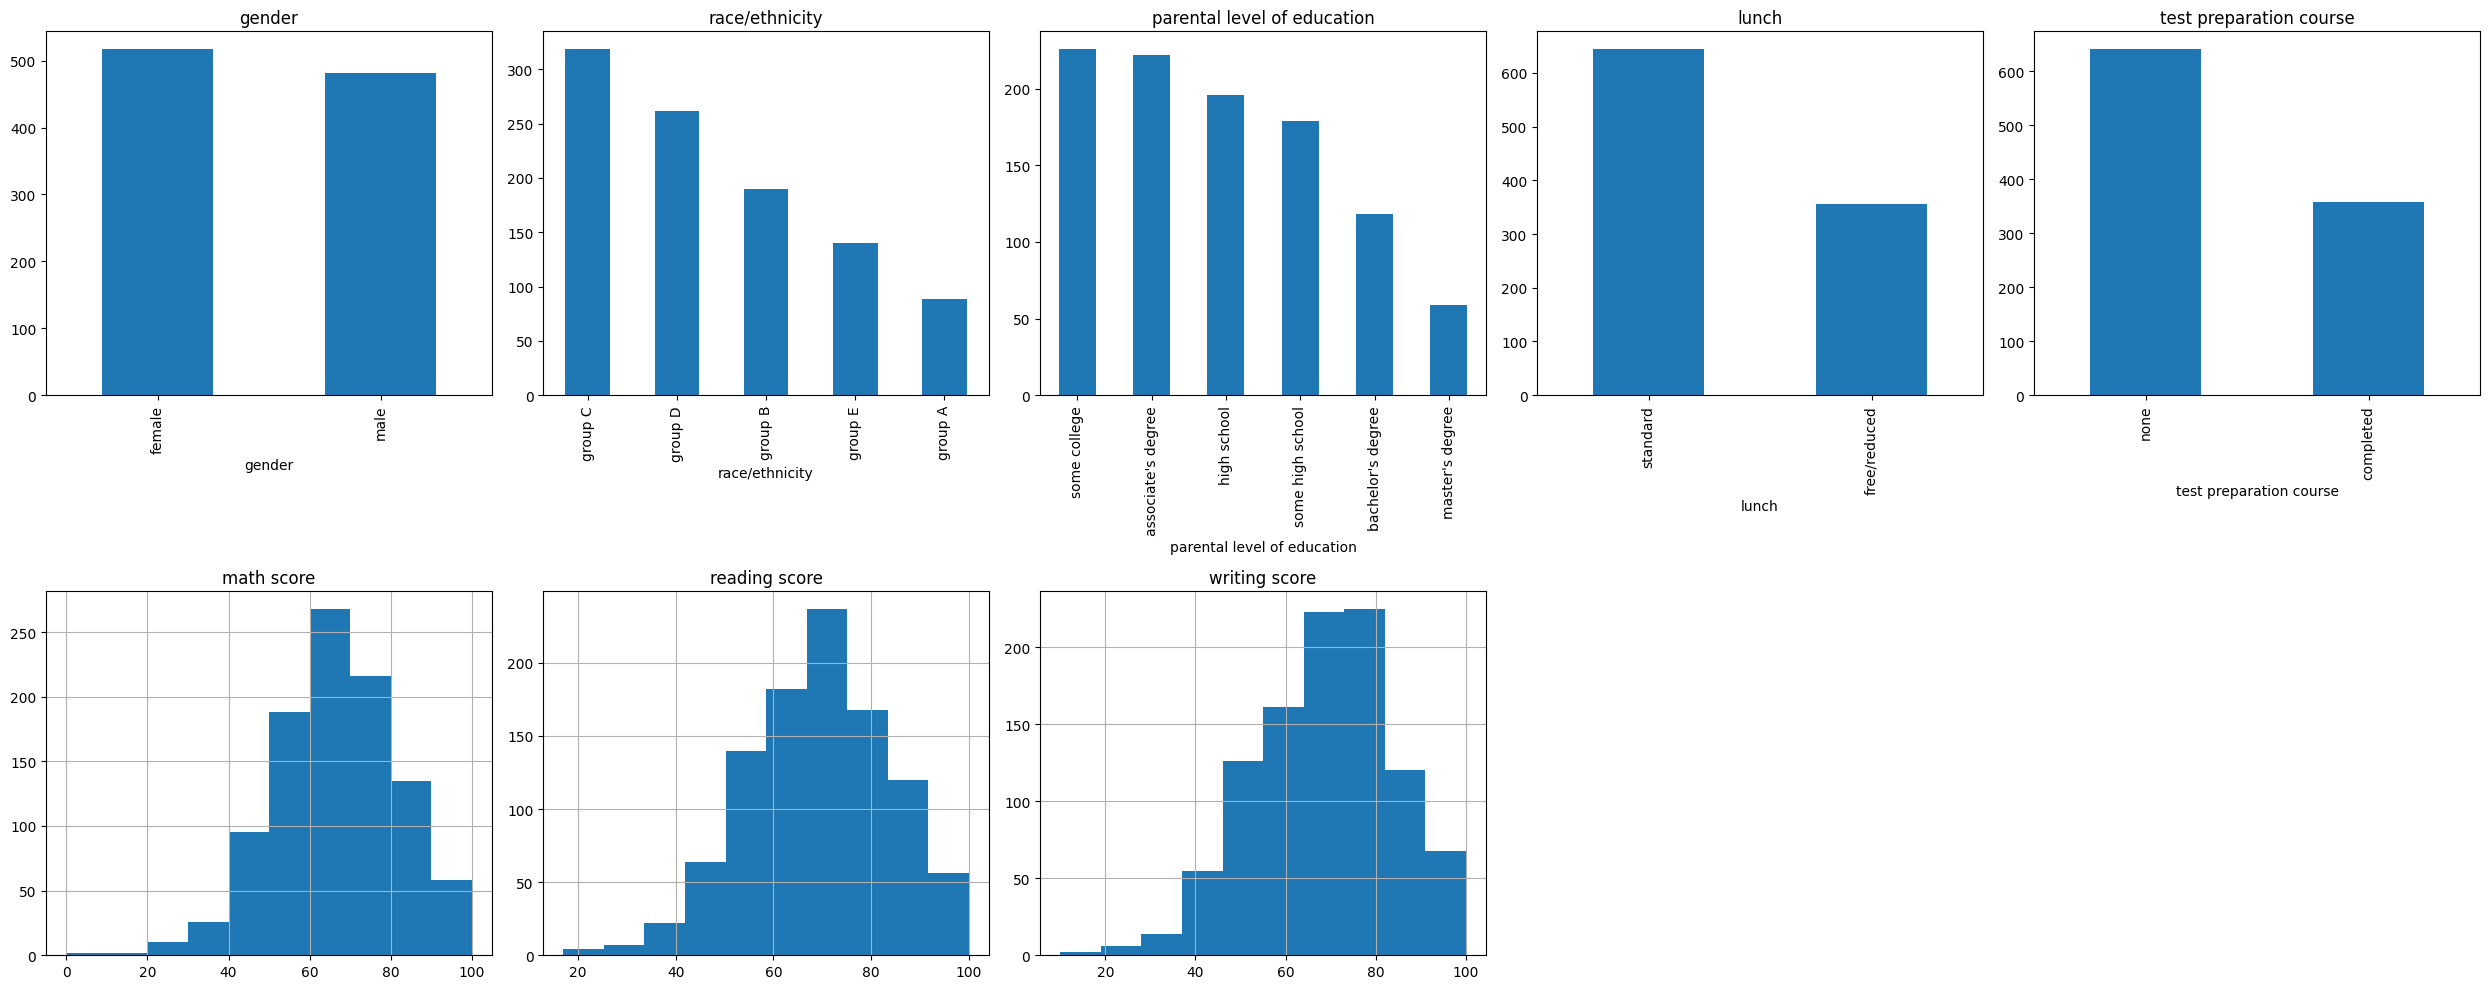

In [29]:
plotPerColumnDistribution(df, 10, 5)
